# INTRODUÇÃO AO OPENCV

## 1. Importação das bibliotecas

### 1.1 Opencv

A openCV é uma biblioteca de visão computacional que possui uma ampla gama de funções para processamento de imagens e vídeos, o que a torna indispensável para o desenvolvimento de aplicações de PDI. Diante disso, é importante que vocês se familiarizem com a biblioteca, pois ela será utilizada em diversas aulas.

In [45]:
# Comando para instalar a biblioteca opencv:
# !pip install opencv-python 

# Importação da biblioteca opencv
import cv2

### 1.2 Matplotlib (Pyplot)

matplotlib.pyplot é uma interface baseada em estado para matplotlib. Ela fornece uma maneira implícita, semelhante ao MATLAB, de plotar. Ela também abre figuras na sua tela e atua como o gerenciador de GUI de figuras.
pyplot é destinado principalmente para gráficos interativos e casos simples de geração programática de gráficos

In [46]:
# Comando para instalar a biblioteca matplotlib:
# !pip install matplotlib

# Importação da biblioteca matplotlib
import matplotlib.pyplot as plt   #matplotlib

### 1.3 Numpy


NumPy é o pacote fundamental para computação científica em Python. É uma biblioteca Python que fornece um objeto array multidimensional, vários objetos derivados (como arrays mascarados e matrizes) e uma variedade de rotinas para operações rápidas em arrays, incluindo matemática, lógica, manipulação de formas, classificação, seleção, E/S, transformadas discretas de Fourier, álgebra linear básica, operações estatísticas básicas, simulação aleatória e muito mais

In [47]:
# Comando para instalar a biblioteca numpy:
# !pip install numpy

# Importação da biblioteca numpy
import numpy as np

## 2. Manipulação de imagens com OpenCV 

### 2.1 Leitura de imagens

In [48]:
# Comando para leitura de imagens
# Por padrão, a imagem é carregada no formato BGR (Blue, Green, Red) ao invés de RGB (Red, Green, Blue)
image_bgr = cv2.imread('../images/lena.png')

# Exibindo a matriz de pixels da imagem
image_bgr

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [49]:

# Exibindo a forma da imagem (altura, largura, canais de cores)
image_bgr.shape

(512, 512, 3)

In [50]:
# Exibindo o pixel (100, 100) da imagem
image_bgr[100, 100]

array([ 78,  68, 178], dtype=uint8)

### 2.2 Exibição de imagens 

In [51]:
# Função genérica para exibir a imagem utilizando matplotlib.pyplot
def show_image(image):

    try:
        if len(image.shape) == 2:
            plt.imshow(image, cmap='gray')
            plt.axis('off')
            plt.show()
        elif len(image.shape) == 3:
            plt.imshow(image)
            plt.axis('off')
            plt.show()
            
    except TypeError:
        print('imagem invalida')

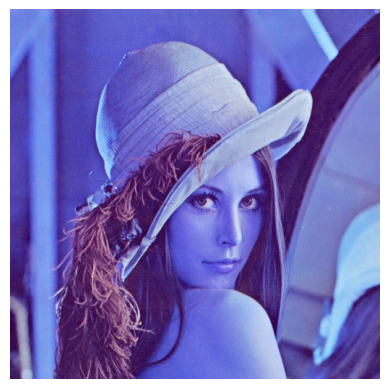

In [52]:
# Exibindo a imagem BGR (padrão do OpenCV)
show_image(image_bgr)

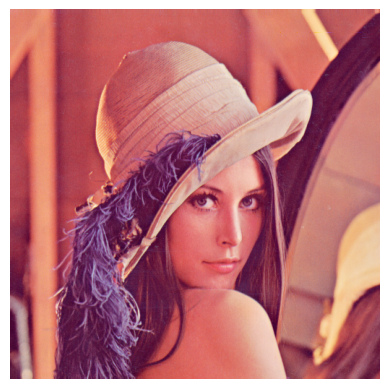

In [53]:
# Convertendo a imagem BGR para RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Exibindo a imagem RGB (Red, Green, Blue)
show_image(image_rgb)

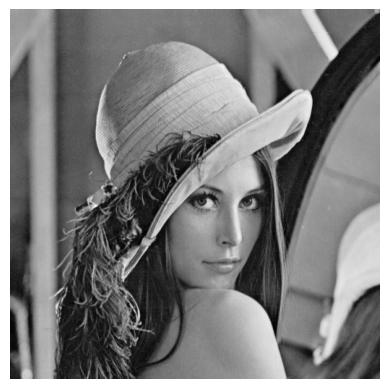

In [54]:
# Convertendo a imagem RGB para escala de cinza
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Exibindo a imagem em escala de cinza
show_image(image_gray)


### 2.3 Separação dos canais de cores

In [55]:
# Separando os canais de cores da imagem RGB
# A função split retorna uma lista com os canais de cores da imagem
red, green, blue = cv2.split(image_rgb)

# Criando uma imagem em branco com a mesma forma da imagem original
# np.zeros é uma função que cria uma matriz com zeros
# image_rgb.shape[:2] é a forma da imagem sem o canal de cores
# dtype='uint8' é o tipo de dado da imagem
blank = np.zeros(image_rgb.shape[:2], dtype='uint8')

# Criando uma imagem com apenas o canal vermelho
canal_vermelho = cv2.merge([red, blank, blank])

# Criando uma imagem com apenas o canal verde
canal_verde = cv2.merge([blank, green, blank])

# Criando uma imagem com apenas o canal azul
canal_azul = cv2.merge([blank, blank, blue])

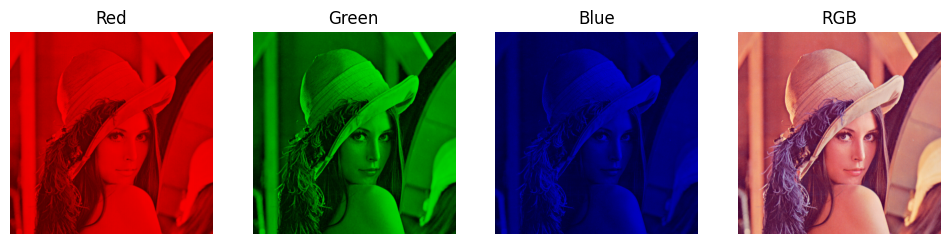

In [56]:
# Exibindo os canais de cores

# Criando uma figura com 1 linha e 4 colunas
plt.figure(figsize=(12, 6))

# Exibindo o canal vermelho
plt.subplot(1, 4, 1)
plt.imshow(canal_vermelho)
plt.title('Red')
plt.axis('off')

# Exibindo o canal verde
plt.subplot(1, 4, 2)
plt.imshow(canal_verde)
plt.title('Green')
plt.axis('off')

# Exibindo o canal azul
plt.subplot(1, 4, 3)
plt.imshow(canal_azul)
plt.title('Blue')
plt.axis('off')

# Exibindo a imagem original
plt.subplot(1, 4, 4)
plt.imshow(image_rgb)
plt.title('RGB')
plt.axis('off')

# Exibindo a figura
plt.show()

### 2.4 Inversão de cores 

In [57]:
# Invertendo as cores da imagem
# A função 1 - (image_rgb / 255.0) é uma operação que inverte as cores da imagem
# O calculo é feito para cada pixel da imagem sendo 1 o valor máximo de cor e 0 o valor mínimo de cor 
inverted_image = 1 - (image_rgb / 255.0)

# Convertendo a imagem para o tipo uint8
inverted_image = (inverted_image * 255).astype(np.uint8)

# Exibindo a  matriz de pixels da imagem invertida
inverted_image

array([[[ 29, 118, 130],
        [ 29, 118, 130],
        [ 32, 118, 121],
        ...,
        [ 24, 106, 132],
        [ 33, 125, 145],
        [ 55, 156, 164]],

       [[ 29, 118, 130],
        [ 29, 118, 130],
        [ 32, 118, 121],
        ...,
        [ 24, 106, 132],
        [ 33, 125, 145],
        [ 55, 156, 164]],

       [[ 29, 118, 130],
        [ 29, 118, 130],
        [ 32, 118, 121],
        ...,
        [ 24, 106, 132],
        [ 33, 125, 145],
        [ 55, 156, 164]],

       ...,

       [[171, 237, 195],
        [171, 237, 195],
        [163, 228, 197],
        ...,
        [ 81, 182, 171],
        [ 82, 187, 179],
        [ 78, 193, 176]],

       [[173, 233, 198],
        [173, 233, 198],
        [159, 223, 193],
        ...,
        [ 76, 185, 176],
        [ 73, 184, 174],
        [ 70, 180, 174]],

       [[173, 233, 198],
        [173, 233, 198],
        [159, 223, 193],
        ...,
        [ 76, 185, 176],
        [ 73, 184, 174],
        [ 70, 180, 174]]

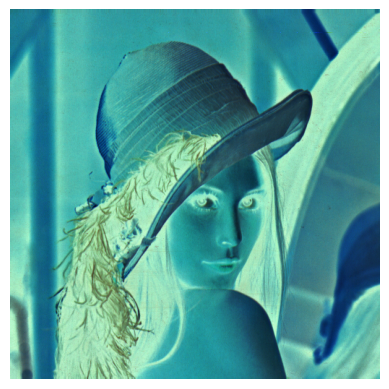

In [58]:
# Exibindo a imagem invertida
show_image(inverted_image)


### 2.5 Ajuste de brilho e contraste

> Brilho e Contraste são valores que somados e/ou multiplicados, alteram os valores de cada um dos pixeis da imagem. Dessa forma, se presupõe-se que, se você tem um valor x de vermelho, e multiplica esse valor por 1.5, teremos uma coloração de pixel com um vermelho mais intenso, dando a percepção de mais brilho a imagem. Em contrapartida, se multiplicarmos o valor de um pixel por 0.5, teremos uma coloração de pixel com um vermelho mais fraco, dando a percepção de menos brilho a imagem.


### Utiliando OpenCV para ajustar brilho e contraste

In [62]:
# Definindo o fator de ajuste de brilho e contraste
# alpha é o fator de ajuste de contraste
# beta é o fator de ajuste de brilho

# Os valores de alpha e beta devem ser maiores que 0
alpha = 1

# Os valores de beta devem ser maiores que 0
beta = 50 

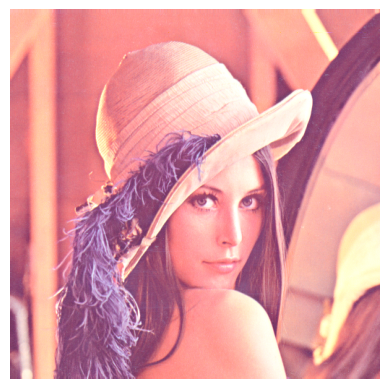

In [63]:
# Ajustando o brilho e contraste da imagem com a função convertScaleAbs
# A função convertScaleAbs é uma função que ajusta o brilho e contraste da imagem

adjusted_image = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

show_image(adjusted_image)

### Alterando brilho e contraste manual

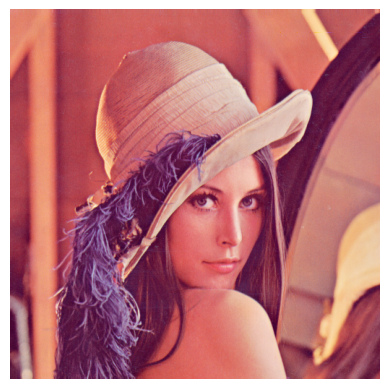

In [61]:
# Ajustando o brilho e contraste da imagem de forma manual

def adjust_brightness_contrast(image, alpha, beta):
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # For para cada canal de cor (R, G, B)
            for c in range(image.shape[2]):
                # Ajustando o brilho e contraste da imagem
                # A função np.clip é uma função que limita o valor de um pixel entre 0 e 255
                # alpha * image[y, x, c] é o valor do pixel ajustado pelo fator de contraste
                # beta é o valor do pixel ajustado pelo fator de brilho
                # image[y, x, c] é o valor do pixel original
                # np.clip(alpha * image[y, x, c] + beta, 0, 255) é o valor do pixel ajustado
                image[y, x, c] = np.clip(alpha * image[y, x, c] + beta, 0, 255)
    return image

adjusted_image = adjust_brightness_contrast(image_rgb, alpha, beta)

show_image(adjusted_image)


### 2.6 Filtros básicos


Lista de filtros básicos:
- Filtro de média
- Filtro de mediana
- Filtro de gauss
- Filtro de sobel
- Filtro de canny
- Filtro de laplace
- Filtro de dilatação
- Filtro de erosão
- Filtro de abertura
- Filtro de fechamento